In [74]:
#Import Liabraries & Functions
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
#Load data in Numpy array from Keras Data mnist
(train_imgs, train_lbls), (test_imgs, test_lbls) = mnist.load_data() 

In [59]:
#Shape of Data
train_imgs.shape

(60000, 28, 28)

In [61]:
#Lenght of Data or Number of samples
len(train_imgs)

60000

In [62]:
#Labels Data in Array
train_lbls

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [63]:
#Data of one particular image
pd.DataFrame(train_imgs[4])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,87,148,55,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,252,253,168,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,4,...,252,253,116,0,0,0,0,0,0,0


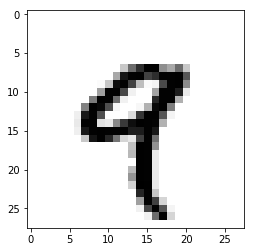

In [64]:
# View Image using Matplotlib Library
plt.imshow(train_imgs[4], cmap=plt.cm.binary)
plt.show()

In [65]:
#Transform Train Data with float32 array of shape(60000, 28*28 with values between 0 and 1)
train_imgs = train_imgs.reshape((60000, 28*28))
train_imgs = train_imgs.astype('float32')/255

In [66]:
#Transform Test Data with float32 array of shape(60000, 28*28 with values between 0 and 1)
test_imgs = test_imgs.reshape((10000, 28*28))
test_imgs = test_imgs.astype('float32')/255

In [67]:
#Categorically encode the Train & Test labels
train_lbls = to_categorical(train_lbls)
test_lbls = to_categorical(test_lbls)

In [68]:
#Create Network 
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [69]:
#Compile network with Loss, Optimizer and metrics
network.compile(optimizer='rmsprop',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [70]:
#Now ready to Train Network :)
#Train data with five epochs with batch size of 128 for better training
network.fit(train_imgs, train_lbls, epochs=5, batch_size=128 )

Epoch 1/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.2568 - acc: 0.9262
Epoch 2/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.1039 - acc: 0.9692
Epoch 3/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0679 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 6s 107us/step - loss: 0.0486 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 6s 108us/step - loss: 0.0371 - acc: 0.9891


In [71]:
#Now check network on Test Data
test_loss, test_acc = network.evaluate(test_imgs, test_lbls)

10000/10000 [==============================] - 1s 80us/step


In [72]:
# Test Loss
test_loss

0.066439197104412595

In [73]:
# Test Accuracy
test_acc

0.97970000000000002